In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%tb
from main import load_dataset
import os 

class opt_config:
    def __init__(self):
        self.dataset = "css3d"
        self.dataset_path = "../data/CSSDataset/CSS-vn-vanilla-v2.json" 
        self.model = "tirg" 
        self.loss = "soft_triplet" 
        self.comment = "css3d_tirg"
        self.embed_dim = 512
        self.learning_rate = 1e-2
        self.weight_decay = 1e-6 
        self.f = ""
        self.learning_rate_decay_frequency = 99999999
        self.batch_size = 32
        self.num_epochs = 100
        self.n_epochs_evaluations = 5
        self.loader_num_workers = 4
        self.pretrained_weights = None
        
opt = opt_config()

trainset, testset = load_dataset(opt)

No traceback available to show.


Reading dataset  css3d
trainset size: 19012
testset size: 19057


In [8]:
num_queries = 0
for i in trainset.mods:
    num_queries += len(i["from"])
num_queries

18012

In [9]:
num_queries = 0
for i in testset.mods:
    num_queries += len(i["from"])
num_queries

18057

In [6]:
trainset.mods[0]

{'make_new_color': 'green',
 'from': [798, 903, 581],
 'make_new_size': None,
 'to_str': 'biến khối cầu lớn bên trái thành màu xanh lá',
 'target_shape': 'circle',
 'target_pos': 'middle-left',
 'to': [1000, 1001, 1002],
 'target_size': 'large',
 'str': ['make'],
 'target_color': None,
 'type': 'make'}

In [15]:
trainset.generate_random_query_target()

{'source_img_id': 310,
 'source_img_data': tensor([[[-0.3027, -0.3027, -0.2856,  ..., -0.3712, -0.3712, -0.3712],
          [-0.2856, -0.3027, -0.3027,  ..., -0.4054, -0.3883, -0.4054],
          [-0.3027, -0.3027, -0.3198,  ..., -0.3883, -0.3883, -0.3883],
          ...,
          [-0.0801, -0.0972, -0.0972,  ...,  0.4679,  0.4679,  0.4679],
          [-0.0972, -0.0972, -0.0801,  ...,  0.4851,  0.4851,  0.4851],
          [-0.0972, -0.0801, -0.0972,  ...,  0.5022,  0.5022,  0.4679]],
 
         [[-0.1800, -0.1800, -0.1625,  ..., -0.2500, -0.2500, -0.2500],
          [-0.1625, -0.1800, -0.1800,  ..., -0.2850, -0.2675, -0.2850],
          [-0.1800, -0.1975, -0.1975,  ..., -0.2675, -0.2675, -0.2675],
          ...,
          [ 0.0301,  0.0301,  0.0126,  ...,  0.5553,  0.5553,  0.5553],
          [ 0.0126,  0.0126,  0.0301,  ...,  0.5728,  0.5903,  0.5728],
          [ 0.0126,  0.0301,  0.0126,  ...,  0.5903,  0.5903,  0.5728]],
 
         [[ 0.0431,  0.0431,  0.0431,  ..., -0.0267, -0.02

In [16]:
# Get number of images
import os
imgs = os.listdir("../data/CSSDataset/images/")
print(len(imgs))

38069


In [11]:
path = opt.dataset_path

nouns = set()
adjs = set()

for f in os.listdir(path + '/images'):
    if ' ' not in f:
        continue
    adj, noun = f.split()
    nouns.add(noun)
    adjs.add(adj)

In [12]:
nouns

{'aluminum',
 'animal',
 'apple',
 'armor',
 'bag',
 'ball',
 'balloon',
 'banana',
 'basement',
 'basket',
 'bathroom',
 'bay',
 'beach',
 'bean',
 'bear',
 'bed',
 'beef',
 'belt',
 'berry',
 'bike',
 'blade',
 'boat',
 'book',
 'bottle',
 'boulder',
 'bowl',
 'box',
 'bracelet',
 'branch',
 'brass',
 'bread',
 'bridge',
 'bronze',
 'bubble',
 'bucket',
 'building',
 'bus',
 'bush',
 'butter',
 'cabinet',
 'cable',
 'cake',
 'camera',
 'candle',
 'candy',
 'canyon',
 'car',
 'card',
 'carpet',
 'castle',
 'cat',
 'cave',
 'ceiling',
 'ceramic',
 'chains',
 'chair',
 'cheese',
 'chicken',
 'chocolate',
 'church',
 'city',
 'clay',
 'cliff',
 'clock',
 'clothes',
 'cloud',
 'coal',
 'coast',
 'coat',
 'coffee',
 'coin',
 'column',
 'computer',
 'concrete',
 'cookie',
 'copper',
 'cord',
 'cotton',
 'creek',
 'deck',
 'desert',
 'desk',
 'diamond',
 'dirt',
 'dog',
 'door',
 'dress',
 'drum',
 'dust',
 'eggs',
 'elephant',
 'envelope',
 'fabric',
 'fan',
 'farm',
 'fence',
 'field',
 'f

In [ ]:
adjs

In [19]:
from torch_functions import UnNormalize
from matplotlib import pyplot as plt
import numpy as np

whipped


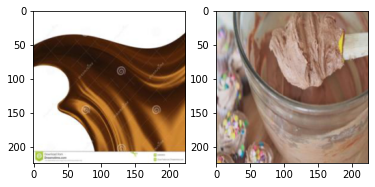

In [66]:
rand = np.random.randint(10000)
item = trainset.__getitem__(rand)
unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

source_img_data = unorm(item["source_img_data"]).detach().numpy()
source_img_data = np.einsum("ijk->jki",source_img_data)
target_img_data = unorm(item["target_img_data"]).detach().numpy()
target_img_data = np.einsum("ijk->jki",target_img_data)
mod = item["mod"]["str"]
plt.subplot(1,2,1)
plt.imshow(source_img_data)
plt.subplot(1,2,2)
plt.imshow(target_img_data)
print(mod)